In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
num_col = df.select_dtypes(include=['int64', 'float64'])
num_col.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [8]:
cat_col = df.select_dtypes(exclude=['int64', 'float64'])
cat_col.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


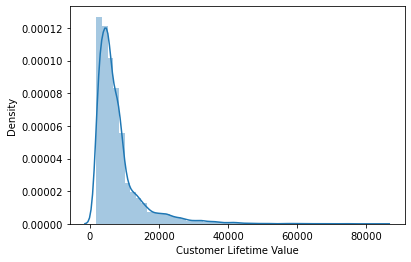

In [9]:
sns.distplot(df['Customer Lifetime Value'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


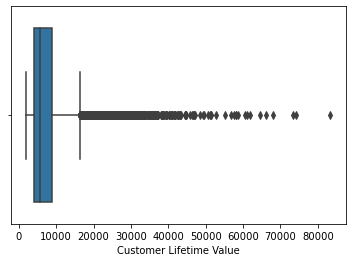

In [10]:
sns.boxplot(df['Customer Lifetime Value'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


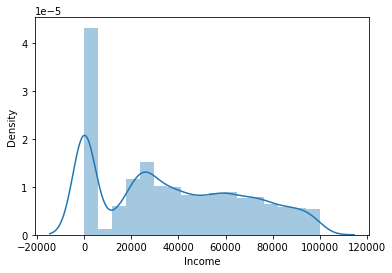

In [11]:
sns.distplot(df['Income'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


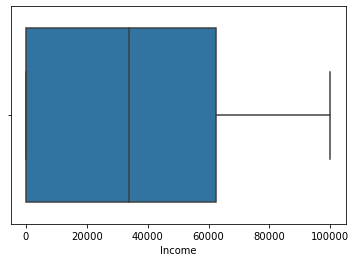

In [12]:
sns.boxplot(df['Income'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


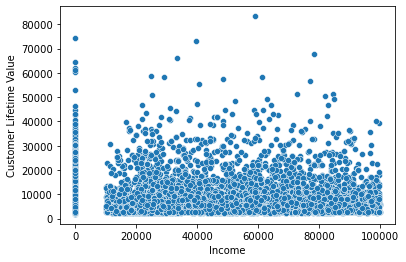

In [13]:
sns.scatterplot(df['Income'], df['Customer Lifetime Value'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


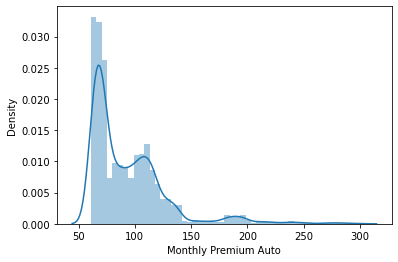

In [14]:
sns.distplot(df['Monthly Premium Auto'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


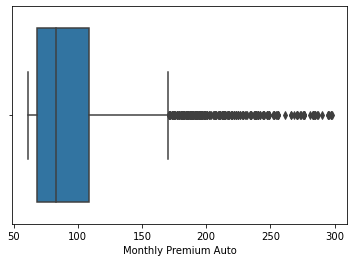

In [15]:
sns.boxplot(df['Monthly Premium Auto'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


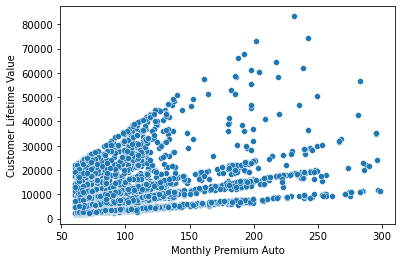

In [16]:
sns.scatterplot(df['Monthly Premium Auto'], df['Customer Lifetime Value'])
plt.show()

In [17]:
num_col.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


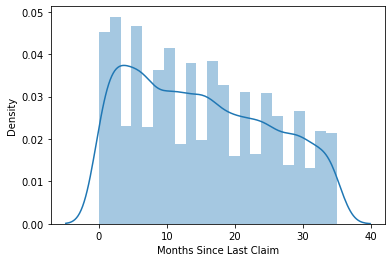

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


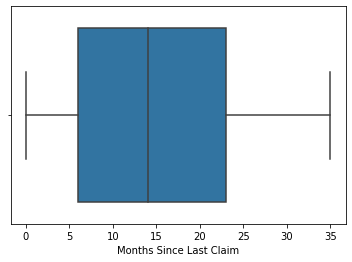

In [18]:
sns.distplot(df['Months Since Last Claim'])
plt.show()

sns.boxplot(df['Months Since Last Claim'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


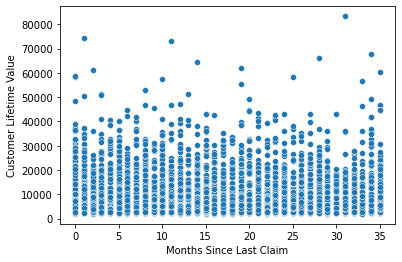

In [19]:
sns.scatterplot(df['Months Since Last Claim'], df['Customer Lifetime Value'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


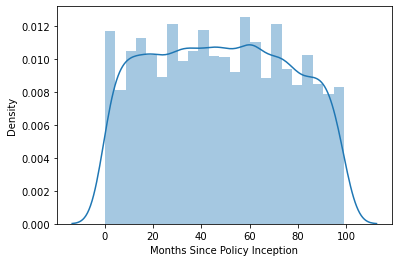

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


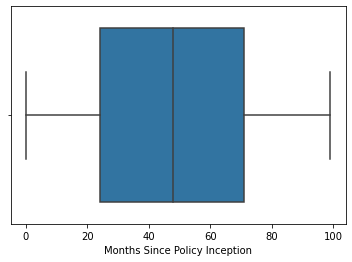

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


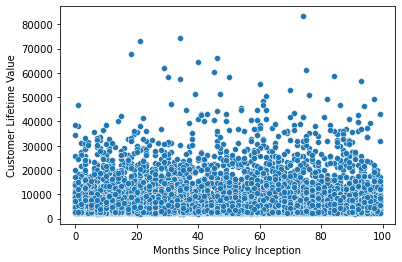

In [20]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

sns.boxplot(df['Months Since Policy Inception'])
plt.show()

sns.scatterplot(df['Months Since Policy Inception'], df['Customer Lifetime Value'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


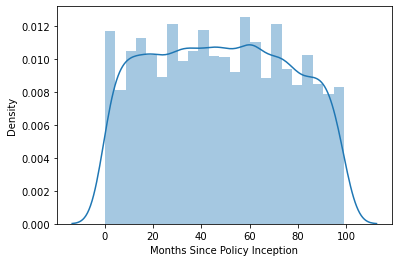

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


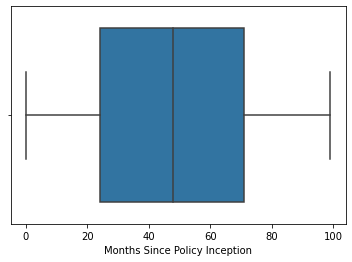

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


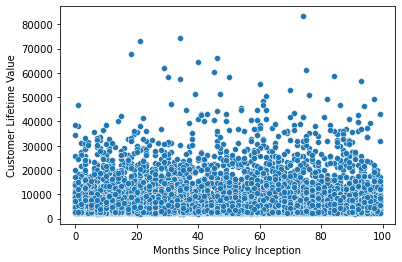

In [21]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

sns.boxplot(df['Months Since Policy Inception'])
plt.show()

sns.scatterplot(df['Months Since Policy Inception'], df['Customer Lifetime Value'])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


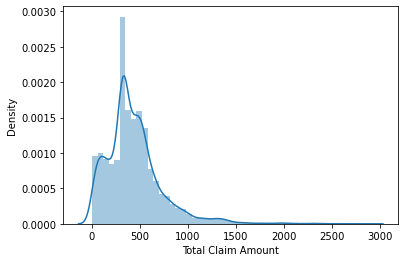

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


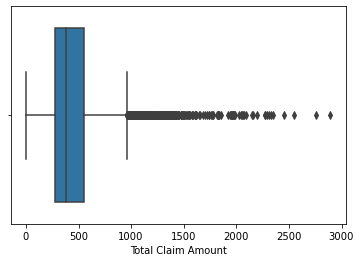

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


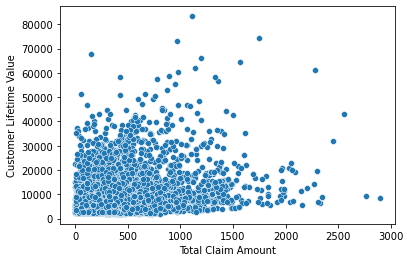

In [22]:
sns.distplot(df['Total Claim Amount'])
plt.show()

sns.boxplot(df['Total Claim Amount'])
plt.show()

sns.scatterplot(df['Total Claim Amount'], df['Customer Lifetime Value'])
plt.show()

In [23]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [25]:
cat_col.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
no_col = df[["Number of Open Complaints","Number of Policies"]]
#cat_col = pd.concat([cat_col,no_col],axis=1)

In [30]:
cat_col.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')

In [50]:
cat_col.head(2)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8


In [51]:
cat_col.shape

(9134, 18)

In [52]:
for i in cat_col:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Ef

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


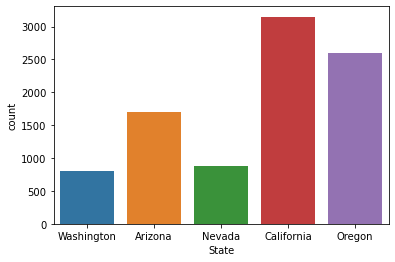

In [53]:
sns.countplot(df["State"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


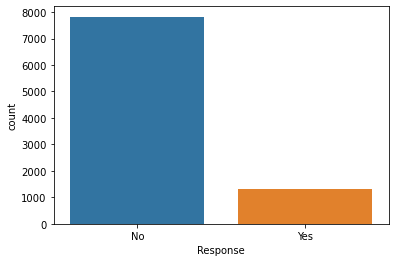

In [54]:
sns.countplot(df["Response"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


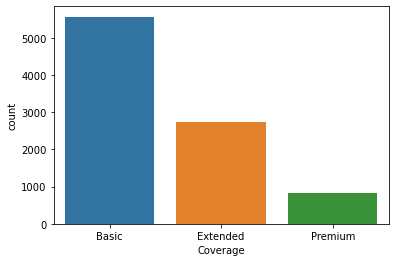

In [55]:
sns.countplot(df["Coverage"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


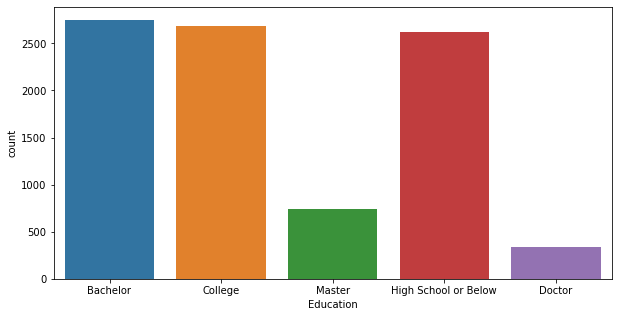

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(df["Education"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


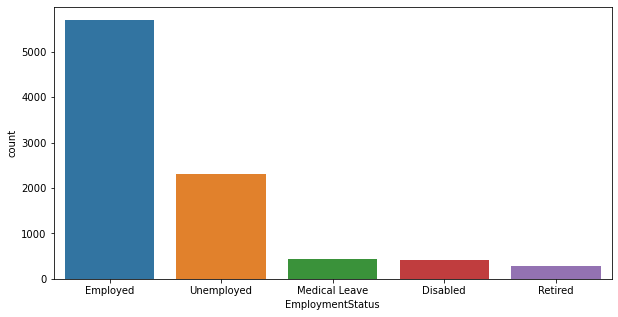

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(df["EmploymentStatus"])
plt.show()

In [58]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

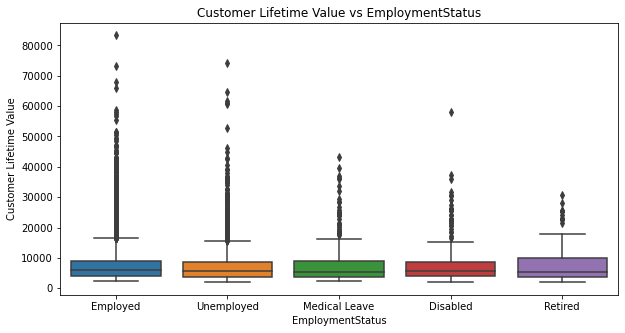

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['Customer Lifetime Value'])
plt.title("Customer Lifetime Value vs EmploymentStatus")
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


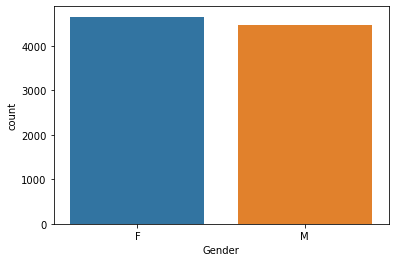

In [60]:
sns.countplot(df["Gender"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


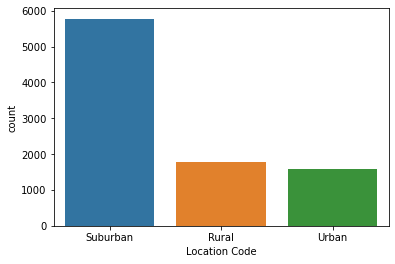

In [61]:
sns.countplot(df["Location Code"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


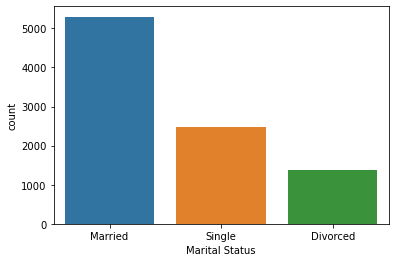

In [62]:
sns.countplot(df["Marital Status"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


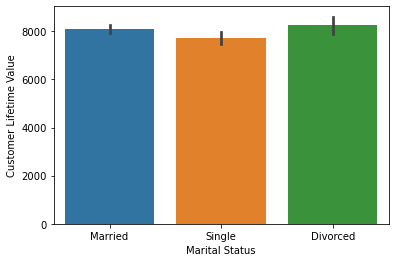

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


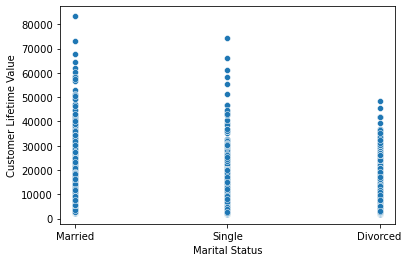

In [63]:
sns.barplot(df["Marital Status"],df["Customer Lifetime Value"])
plt.show()

sns.scatterplot(df["Marital Status"],df["Customer Lifetime Value"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


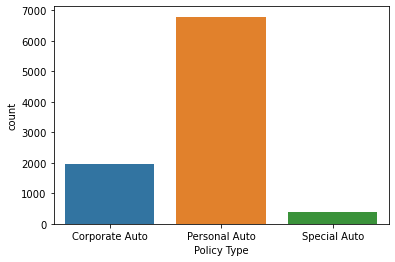

In [64]:
sns.countplot(df["Policy Type"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


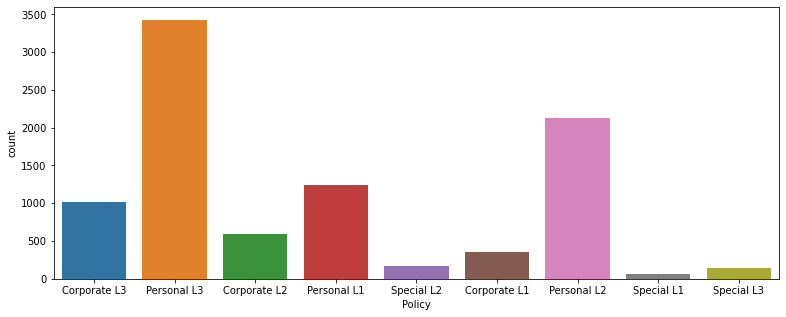

In [65]:
plt.figure(figsize=(13,5))
sns.countplot(df["Policy"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


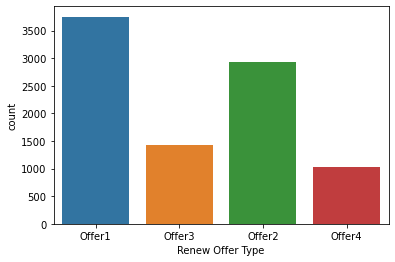

In [66]:
sns.countplot(df["Renew Offer Type"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


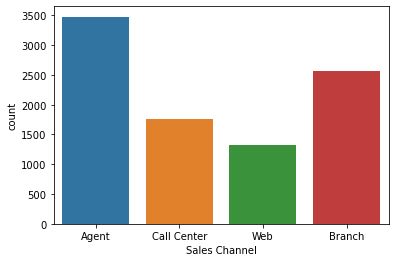

In [67]:
sns.countplot(df["Sales Channel"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


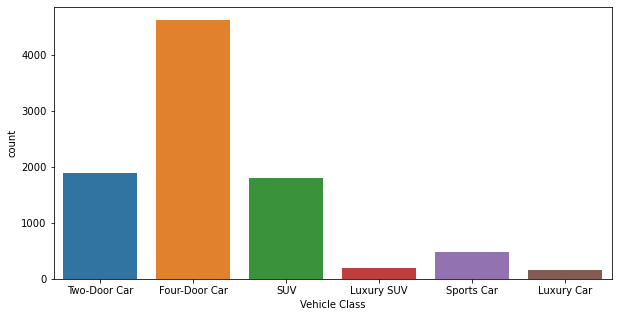

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Class"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


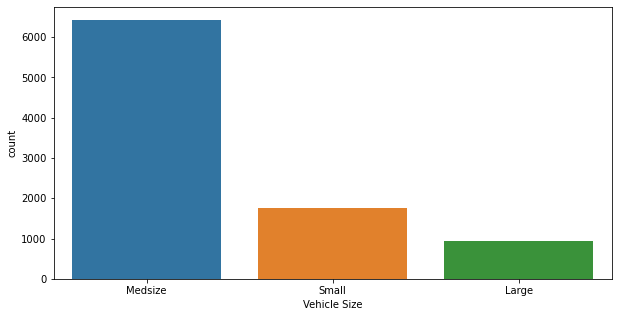

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Size"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


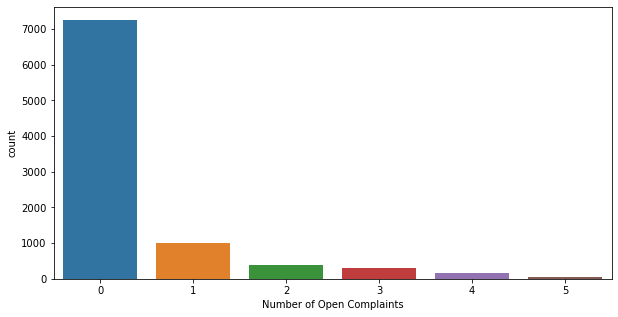

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(df["Number of Open Complaints"])
plt.show()

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


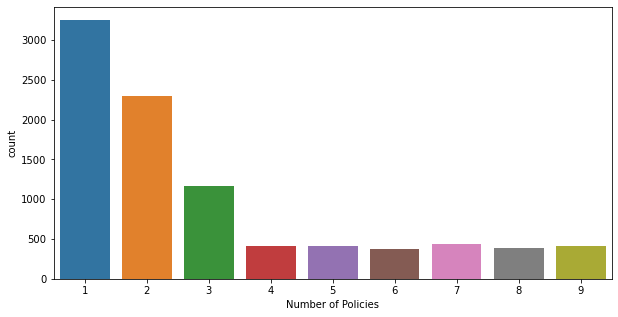

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(df["Number of Policies"])
plt.show()

In [72]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [73]:
df["Months"] = df["Effective To Date"].dt.month

In [74]:
df['Months'] = df['Months'].astype('object')

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


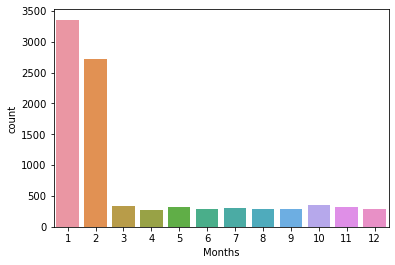

In [75]:
sns.countplot(df["Months"])
plt.show()

In [76]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

In [77]:
heatmap = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

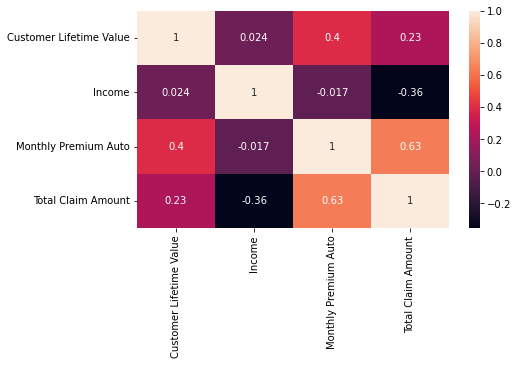

In [78]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

In [79]:
stats.shapiro(df['Customer Lifetime Value'])

C:\Users\Radhika\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033728361129761, pvalue=0.0)

In [81]:
columns_cat = list(cat_col.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [82]:
len(columns_cat)

18

In [83]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

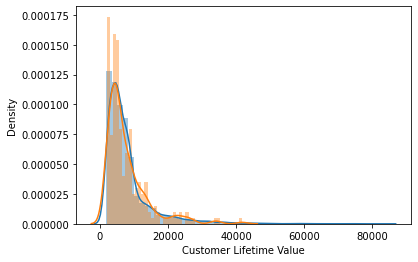

In [84]:
sns.distplot(df[df['Response']=='No']['Customer Lifetime Value'])
sns.distplot(df[df['Response']=='Yes']['Customer Lifetime Value'])

In [85]:
stats.mannwhitneyu(df[df['Response']=='No']['Customer Lifetime Value'], df[df['Response']=='Yes']['Customer Lifetime Value'])

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)

In [86]:
male=df[df['Gender']=='M']['Customer Lifetime Value']
female=df[df['Gender']=='F']['Customer Lifetime Value']

In [87]:
stats.mannwhitneyu(male,female)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)

In [88]:
ca=df[df['State']=='California']['Customer Lifetime Value']
Or=df[df['State']=='Oregon']['Customer Lifetime Value']
Ar=df[df['State']=='Arizona']['Customer Lifetime Value']
Ne=df[df['State']=='Nevada']['Customer Lifetime Value']
Wa=df[df['State']=='Washington']['Customer Lifetime Value']

In [89]:
stats.kruskal(ca, Or, Ar, Ne, Wa)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)

C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

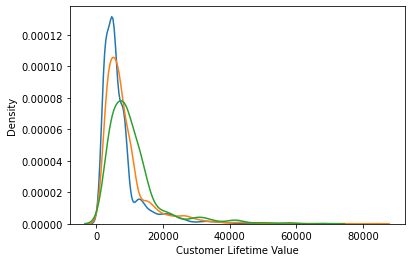

In [90]:
sns.distplot(df[df['Coverage']=='Basic']['Customer Lifetime Value'],hist=False,label='Basic')
sns.distplot(df[df['Coverage']=='Extended']['Customer Lifetime Value'],hist=False)
sns.distplot(df[df['Coverage']=='Premium']['Customer Lifetime Value'],hist=False)
plt.show()

In [91]:
stats.kruskal(df[df['Coverage']=='Basic']['Customer Lifetime Value'],df[df['Coverage']=='Extended']['Customer Lifetime Value'],\
              df[df['Coverage']=='Premium']['Customer Lifetime Value'])

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)

In [92]:
stats.f_oneway(df[df['Coverage']=='Basic']['Customer Lifetime Value'],df[df['Coverage']=='Extended']['Customer Lifetime Value'],\
              df[df['Coverage']=='Premium']['Customer Lifetime Value'])

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [93]:
Ba=df[df['Education']=='Bachelor']['Customer Lifetime Value']
Co=df[df['Education']=='College']['Customer Lifetime Value']
Hi=df[df['Education']=='High School or Below']['Customer Lifetime Value']
Ma=df[df['Education']=='Master']['Customer Lifetime Value']
Da=df[df['Education']=='Doctor']['Customer Lifetime Value']

In [94]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Radhika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

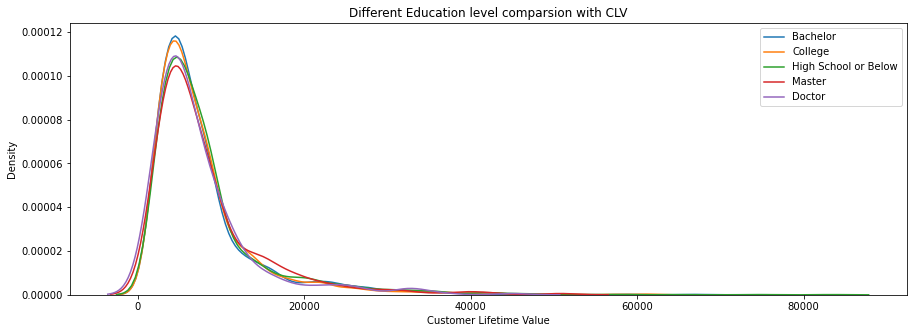

In [95]:
plt.figure(figsize=(15,5))
sns.distplot(Ba,hist=False,label='Bachelor')
sns.distplot(Co,hist=False,label='College')
sns.distplot(Hi,hist=False,label='High School or Below')
sns.distplot(Ma,hist=False,label='Master')
sns.distplot(Da,hist=False,label='Doctor')
plt.title("Different Education level comparsion with CLV")
# plt.savefig("Education.png")
plt.legend(loc = "best")
plt.show()

In [96]:
Em=df[df['EmploymentStatus']=='Employed']['Customer Lifetime Value']
Un=df[df['EmploymentStatus']=='Unemployed']['Customer Lifetime Value']
Me=df[df['EmploymentStatus']=='Medical Leave']['Customer Lifetime Value']
Di=df[df['EmploymentStatus']=='Disabled']['Customer Lifetime Value']
Re=df[df['EmploymentStatus']=='Retired']['Customer Lifetime Value']

In [97]:
stats.kruskal(Em,Un,Me,Di,Re)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)

In [98]:
stats.kruskal(df[df['Location Code']=='Suburban']['Customer Lifetime Value'],\
              df[df['Location Code']=='Rural']['Customer Lifetime Value'],\
              df[df['Location Code']=='Urban']['Customer Lifetime Value'])

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)

In [99]:
Ma=df[df['Marital Status']=='Married']['Customer Lifetime Value']
Si=df[df['Marital Status']=='Single']['Customer Lifetime Value']
Di=df[df['Marital Status']=='Divorced']['Customer Lifetime Value']

In [100]:
stats.kruskal(Ma, Si, Di)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)

In [101]:
a=df[df['Number of Open Complaints']==0]['Customer Lifetime Value']
b=df[df['Number of Open Complaints']==1]['Customer Lifetime Value']
c=df[df['Number of Open Complaints']==2]['Customer Lifetime Value']
d=df[df['Number of Open Complaints']==3]['Customer Lifetime Value']
e=df[df['Number of Open Complaints']==4]['Customer Lifetime Value']
f=df[df['Number of Open Complaints']==5]['Customer Lifetime Value']

In [102]:
stats.kruskal(a,b,c,d,e,f)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)

In [103]:
a1=df[df['Number of Policies']==1]['Customer Lifetime Value']
b1=df[df['Number of Policies']==2]['Customer Lifetime Value']
c1=df[df['Number of Policies']==3]['Customer Lifetime Value']

In [104]:
stats.kruskal(a1,b1,c1)

KruskalResult(statistic=5017.7060662040785, pvalue=0.0)

In [105]:
Pe=df[df['Policy Type']=='Personal Auto']['Customer Lifetime Value']
Cor=df[df['Policy Type']=='Corporate Auto']['Customer Lifetime Value']
Sp=df[df['Policy Type']=='Special Auto']['Customer Lifetime Value']

In [106]:
stats.kruskal(Pe,Cor,Sp)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)

In [107]:
P3=df[df['Policy']=='Personal L3']['Customer Lifetime Value']
P2=df[df['Policy']=='Personal L2']['Customer Lifetime Value']
P1=df[df['Policy']=='Personal L1']['Customer Lifetime Value']
C3=df[df['Policy']=='Corporate L3']['Customer Lifetime Value']
C2=df[df['Policy']=='Corporate L2']['Customer Lifetime Value']
C1=df[df['Policy']=='Corporate L1']['Customer Lifetime Value']
S2=df[df['Policy']=='Special L2']['Customer Lifetime Value']
S3=df[df['Policy']=='Special L3']['Customer Lifetime Value']
S1=df[df['Policy']=='Special L1']['Customer Lifetime Value']

In [108]:
stats.kruskal(P3, P2, P1, C3, C2, C1, S2, S3, S1)

KruskalResult(statistic=7.944351884462466, pvalue=0.4389248352544014)

In [109]:
O1=df[df['Renew Offer Type']=='Offer1']['Customer Lifetime Value']
O2=df[df['Renew Offer Type']=='Offer2']['Customer Lifetime Value']
O3=df[df['Renew Offer Type']=='Offer3']['Customer Lifetime Value']
O4=df[df['Renew Offer Type']=='Offer4']['Customer Lifetime Value']

In [110]:
stats.kruskal(O1, O2, O3, O4)

KruskalResult(statistic=168.90219457792458, pvalue=2.196144881912684e-36)

In [111]:
Ag=df[df['Sales Channel']=='Agent']['Customer Lifetime Value']
Br=df[df['Sales Channel']=='Branch']['Customer Lifetime Value']
Ca=df[df['Sales Channel']=='Call Center']['Customer Lifetime Value']
We=df[df['Sales Channel']=='Web']['Customer Lifetime Value']

In [112]:
stats.kruskal(Ag, Br, Ca, We)

KruskalResult(statistic=4.491751501229693, pvalue=0.2130272157209903)

In [113]:
Fo=df[df['Vehicle Class']=='Four-Door Car']['Customer Lifetime Value']
Tw=df[df['Vehicle Class']=='Two-Door Car']['Customer Lifetime Value']
Su=df[df['Vehicle Class']=='SUV']['Customer Lifetime Value']
Sp=df[df['Vehicle Class']=='Sports Car']['Customer Lifetime Value']
LS=df[df['Vehicle Class']=='Luxury SUV']['Customer Lifetime Value']
Lu=df[df['Vehicle Class']=='Luxury Car']['Customer Lifetime Value']

In [114]:
stats.kruskal(Fo, Tw, Su, Sp, LS, Lu)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)

In [115]:
Me=df[df['Vehicle Size']=='Medsize']['Customer Lifetime Value']
Sm=df[df['Vehicle Size']=='Small']['Customer Lifetime Value']
La=df[df['Vehicle Size']=='Large']['Customer Lifetime Value']

In [116]:
stats.kruskal(Me, Sm, La)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)

In [117]:
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [118]:
cat_col.drop('Customer', axis = 1, inplace = True)

In [119]:
cat_col

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,10/2/2011,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,12/2/2011,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,6/2/2011,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,3/2/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [120]:
a = stats.kruskal(ca, Or, Ar, Ne, Wa)
b = stats.mannwhitneyu(male,female)
#c = stats.mannwhitneyu(df[df['Gender']=='M']['Customer Lifetime Value'], df[df['Gender']=='F']['Customer Lifetime Value'])
c = stats.kruskal(df[df['Coverage']=='Basic']['Customer Lifetime Value'],df[df['Coverage']=='Extended']['Customer Lifetime Value'],\
              df[df['Coverage']=='Premium']['Customer Lifetime Value'])
            
d = stats.kruskal(Ba,Co,Hi,Ma,Da)
e = stats.kruskal(Em,Un,Me,Di,Re)
f = stats.mannwhitneyu(df[df['Response']=='No']['Customer Lifetime Value'], df[df['Response']=='Yes']\
                       ['Customer Lifetime Value'])
g = stats.kruskal(df[df['Location Code']=='Suburban']['Customer Lifetime Value'],df[df['Location Code']=='Rural']['Customer Lifetime Value'],df[df['Location Code']=='Urban']['Customer Lifetime Value'])
h = stats.kruskal(Ma, Si, Di)
i = stats.kruskal(Pe,Cor,Sp)
j = stats.kruskal(P3, P2, P1, C3, C2, C1, S2, S3, S1)
k = stats.kruskal(O1, O2, O3, O4)
l = stats.kruskal(Ag, Br, Ca, We)
m = stats.kruskal(Fo, Tw, Su, Sp, LS, Lu)
n = stats.kruskal(Me, Sm, La)
o = stats.kruskal(a,b,c,d,e,f)
p = stats.shapiro(df['Customer Lifetime Value'])

C:\Users\Radhika\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [121]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]

In [122]:
p_values

[0.27998232358818953,
 0.48749303056449833,
 7.648852917746348e-110,
 0.0045992620332008655,
 1.9186185040926767e-07,
 0.5168872245291198,
 0.29173464205664124,
 2.9009146434700455e-05,
 1.9015440216719662e-26,
 0.4389248352544014,
 2.196144881912684e-36,
 0.2130272157209903,
 3.309676344717952e-281,
 0.00837505335446059,
 0.8699966389487446,
 0.0]

In [123]:
len(cat_col.columns)

17

In [124]:
cat_col.drop("Effective To Date",axis=1,inplace=True)

In [125]:
len(p_values)

16

In [126]:
pd.DataFrame(p_values,index=(cat_col.columns),columns=['P_Value'])

,P_Value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,4.599262e-03
EmploymentStatus,1.918619e-07
Gender,5.168872e-01
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,1.901544e-26
Policy,4.389248e-01


In [127]:
num_col.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [128]:
cat_col.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [129]:
cat_col.isna().sum()

State                        0
Response                     0
Coverage                     0
Education                    0
EmploymentStatus             0
Gender                       0
Location Code                0
Marital Status               0
Policy Type                  0
Policy                       0
Renew Offer Type             0
Sales Channel                0
Vehicle Class                0
Vehicle Size                 0
Number of Open Complaints    0
Number of Policies           0
dtype: int64

In [130]:
num_col.isna().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [131]:
catg=pd.get_dummies(cat_col,drop_first=True)

In [132]:
catg

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,8,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,7,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,1,1,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
9131,3,2,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,3,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [133]:
#dfn = pd.concat([num_col,catg],axis=1)
dfn.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Number of Open Complaints,Number of Policies,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,8,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,2,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,7,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,1,...,0,0,0,0,0,0,0,0,1,0


# The problem statement is Regression problem so we will use regression algorithms

In [134]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['Customer Lifetime Value','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=dfn['Customer Lifetime Value']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [135]:
num_col.rename(columns={'CLV':'CLV'},inplace=True)

In [136]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 44)
(6393,)
(2741, 44)
(2741,)


In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [139]:
print(f"Training score of model is {lr.score(X_train, y_train)}")
print(f"Testing score of the model is : {lr.score(X_test, y_test)}")

Training score of model is 0.26073373730563176
Testing score of the model is : 0.2548416026499807


In [140]:
y_Pred = lr.predict(X_test)

In [141]:
y_Pred

array([8.89475175, 8.54790233, 8.61501537, ..., 9.06963594, 8.49140362,
       9.05673092])

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [143]:
print(f"Mean squared error is {mean_squared_error(y_test, y_Pred)}")

Mean squared error is 0.3331961068654929


In [144]:
print("Mean absolute error is {}".format(mean_absolute_error(y_test, y_Pred)))

Mean absolute error is 0.4455033282270872


In [145]:
from math import sqrt

In [146]:
rmse = sqrt(mean_squared_error(y_test, y_Pred))

In [147]:
print(f"Root mesn squared error is {rmse})")

Root mesn squared error is 0.5772314153487256)


In [148]:
lr.coef_

array([ 5.88794795e-07,  7.34822559e-03,  6.33305513e-04, -1.35498470e-05,
       -1.79791106e-02,  2.57412553e-02,  5.72837958e-05, -1.79791106e-02,
        2.57412553e-02,  1.79030643e-02, -3.27232552e-03, -2.07408405e-03,
       -2.37554277e-02, -4.45641905e-02,  4.30032104e-02,  4.94602209e-02,
        8.72656710e-03, -1.20708784e-02,  4.65003972e-02,  3.71436676e-02,
        1.28248765e-02, -1.55893561e-02, -2.57610553e-02, -4.68442495e-02,
        2.49564296e-03, -5.46924212e-02, -2.70581252e-02,  7.58188998e-03,
       -3.78002447e-02, -5.50806379e-02, -3.37920995e-02, -1.27549316e-01,
       -8.04575046e-02, -1.37699445e-01,  1.80422737e-02,  1.60623222e-02,
        6.94752779e-03, -6.40212917e-02, -9.36434322e-02,  1.20830104e-01,
        8.58411917e-02,  2.22056927e-02,  4.60074551e-02,  4.28711029e-02])

In [149]:
num_features_to_keep = 3

In [150]:
from sklearn.feature_selection import RFE

In [151]:
rfe = RFE(lr, n_features_to_select=num_features_to_keep)
X_train_rfe = rfe.fit_transform(X_train, y_train)

In [152]:
lr.fit(X_train_rfe, y_train)

LinearRegression()

In [153]:
X_test_rfe = rfe.transform(X_test)
y_pred = model.predict(X_test_rfe)

In [154]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.3932533065635671


In [155]:
rmse = sqrt(rmse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.7597574714003973


In [156]:
from sklearn.tree import DecisionTreeRegressor

In [157]:
dt = DecisionTreeRegressor()

In [158]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [159]:
yPred = dt.predict(X_test)

In [160]:
yPred

array([ 8.35118205,  8.58986492,  8.24489147, ...,  8.57708667,
        8.5401746 , 10.22348081])

In [161]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_Pred)))
print("MAE",mean_absolute_error(y_test,y_Pred))
print('MSE:',mean_squared_error(y_test,y_Pred)) 

RMSE: 0.5772314153487256
MAE 0.4455033282270872
MSE: 0.3331961068654929


In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
ypr = rfr.predict(X_test)

In [164]:
print("Mean squared error is {}" .format(mean_squared_error(y_test, ypr)))

Mean squared error is 0.038736934786391924


In [165]:
print("Root Mean squared error is {}" .format(sqrt(mean_squared_error(y_test, ypr))))

Root Mean squared error is 0.19681700837679636


In [166]:
print("Mean absolute error is {}" .format(mean_absolute_error(y_test, ypr)))

Mean absolute error is 0.08940861192720638


In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
param_grid = {
    'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
}

In [173]:
grid = GridSearchCV(estimator = rfr, param_grid=param_grid, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 200}

In [174]:
rfr = RandomForestRegressor(**grid.best_params_)

rfr.fit(X_train,y_train)

y_pred=rfr.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMSE: 0.19703855567479006
MAE 0.08926608617385688
MSE: 0.038824192422407346


In [175]:
from sklearn.ensemble import AdaBoostRegressor

In [177]:
ada = AdaBoostRegressor(n_estimators=200, random_state = 42)

In [178]:
ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=200, random_state=42)

In [180]:
pred = ada.predict(X_test)

In [181]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print("MAE",mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))

RMSE: 0.2940362660548777
MAE 0.23707841395670678
MSE: 0.08645732575549482


In [182]:
pd.DataFrame(rfr.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.359551
Number of Policies,0.313527
Monthly Premium Auto,0.230836
Total Claim Amount,0.014426
Income,0.012862
Months Since Policy Inception,0.012519
Months Since Last Claim,0.012389
Coverage_Extended,0.003092
EmploymentStatus_Employed,0.002865
Renew Offer Type_Offer2,0.001860


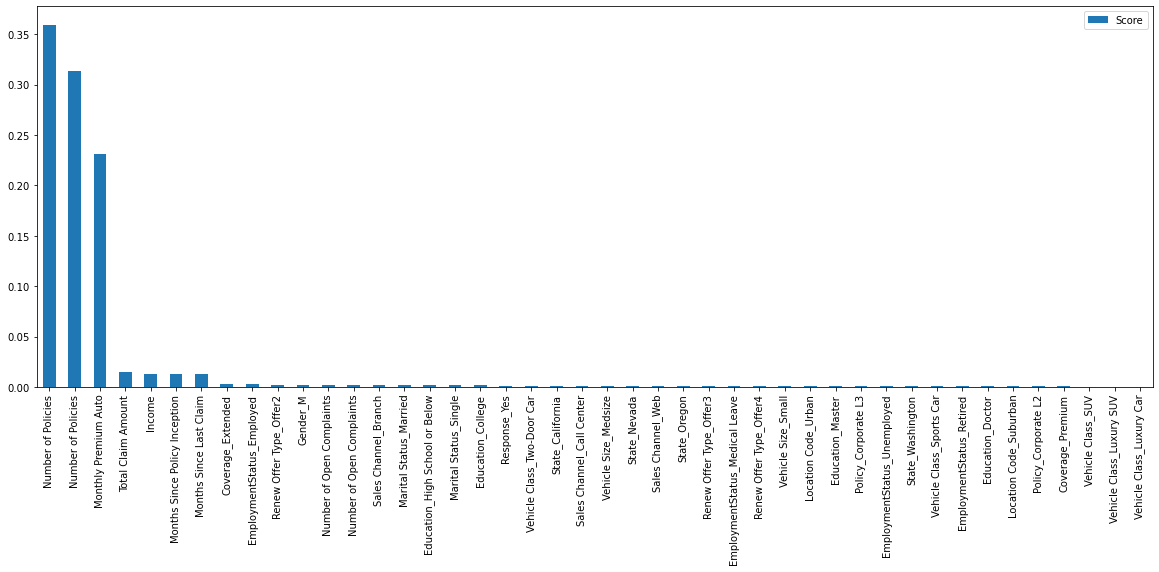

In [184]:
pd.DataFrame(rfr.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()